In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from customTransformers import (ColumnSelectTransformer, DiagnosisFrameTransformer, 
                                ColumnMergeTransformer
                               )

In [2]:
X_train, y_train = pd.read_pickle('./data/pickle/preproc/df_patient_admit_icu_notes__20210206_singleICUSTAY_TRAIN_final.pkl')

In [2]:
file = './data/pickle/models/log__URGENCY__20210216_withTEXT_diagnNoNumerics.pkl'
model_data = pickle.load(open(file,'rb'))

In [3]:
num_cols = model_data['numeric_cols']
cols = model_data['categorical_cols']
ohe = model_data['ohe_categoricals']
ordenc = model_data['ord_enc_y']
fu = model_data['feature_union']
tv = model_data['text_vect']
est = model_data['estimator'].best_estimator_

In [32]:
file = './data/pickle/models/log__URGENCY__20210304_forFlask_from_20210216.pkl'
pickle.dump((text_dft, est), open(file,'wb'))

In [5]:
# count = CountVectorizer(max_features=11000, min_df=5e-5, ngram_range=(1,2))
# tfidf = TfidfTransformer(norm='l2')
# reg = LogisticRegression(solver='saga', C=5, multi_class='ovr', l1_ratio=0.1, penalty='elasticnet')

In [6]:
# cols = ['GENDER','ADMISSION_TYPE','ADMISSION_LOCATION','INSURANCE','LANGUAGE',
#        'RELIGION','MARITAL_STATUS','ETHNICITY']
# num_cols = ['ADMIT_AGE']

# ohe = ColumnTransformer([('categorical', OneHotEncoder(handle_unknown='ignore'), cols)])
# demog_feats = FeatureUnion([
#     ('stdscl', ColumnTransformer([('numerical', StandardScaler(), num_cols)])),
#     ('ohe',  ohe)
# ])

# text_feats = Pipeline([
#     ('dft', DiagnosisFrameTransformer(['DIAGNOSIS'])),
#     ('cmt', ColumnMergeTransformer(['DIAGNOSIS','TEXT'])),
#     ('cst', ColumnSelectTransformer('DIAGNOSIS_TEXT')),
#     ('count', count),
#     ('tfidf', tfidf)
# ])

# feats_union = FeatureUnion([
#     ('demog_feats', demog_feats),
#     ('text_feats', text_feats)
# ])

# lin_pipe = Pipeline([
#     ('features', feats_union),
#     ('reg', reg)
# ])

# pd.set_option('mode.chained_assignment',None)
# ordenc = OrdinalEncoder(categories=[['stable','questionable','urgent','immediate']])
# y_train_enc = ordenc.fit_transform(pd.DataFrame(y_train)) 

# lin_est = lin_pipe.fit(X_train,y_train_enc)

/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/adamgifford/anaconda3/lib/python3.

In [5]:
X_test, y_test = pd.read_pickle('./data/pickle/preproc/df_patient_admit_icu_notes__20210206_singleICUSTAY_TEST_final.pkl')

In [6]:
y_test_enc = ordenc.transform(pd.DataFrame(y_test))
y_pred = est.predict(X_test)

In [7]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix

0.651414309484193
0.642933543921841
PRED


/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


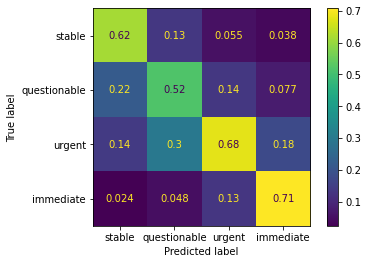

In [10]:
print(accuracy_score(y_test_enc,y_pred))
print(f1_score(y_test_enc,y_pred, average='weighted'))
print('PRED')
plot_confusion_matrix(est, X_test,y_test_enc,display_labels=['stable','questionable','urgent','immediate'],normalize='pred');

TRUE


/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


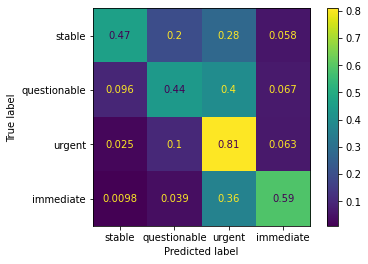

In [11]:
print('TRUE')
plot_confusion_matrix(est, X_test,y_test_enc,display_labels=['stable','questionable','urgent','immediate'],normalize='true');

In [12]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Viridis256
from bokeh.models import LinearColorMapper, ColumnDataSource, ColorBar

In [13]:
output_notebook()

Loading BokehJS ...

In [9]:
labels = ['stable','questionable','urgent','immediate']
y_true_labels = [labels[int(y[0])] for y in y_test_enc]
y_pred_labels = [labels[int(y)] for y in y_pred]

# perf = {'y_pred': ,
#           'counts': confusion_matrix(y_test_enc,y_pred).ravel(),
#           'y_true': }

matrix = confusion_matrix(y_test_enc,y_pred)
pred = matrix/matrix.sum(axis=0)
true = matrix / matrix.sum(axis=1)[:,None]
all_ = matrix/matrix.sum()
# ('s','s'), ('q','s'), ('u','s'), ('i', 's')

In [14]:
data_dict = {
    'y' : ['stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',],
    'x' : ['stable','stable','stable','stable',
                    'questionable','questionable','questionable','questionable',
                    'urgent','urgent','urgent','urgent',
                    'immediate','immediate','immediate','immediate'],
    'raw': matrix.ravel(),
    'true': true.ravel(),
    'pred': pred.ravel(),
    'all': all_.ravel()
}
source = ColumnDataSource(data=data_dict)

mapper = LinearColorMapper(
    palette='Viridis256',
    low=0,
    high=true.max()
)
colors= { 'field': true, 'transform': mapper}
color_bar = ColorBar( color_mapper=mapper, location=( 0, 0))

TOOLTIPS = [
    ("(Pred., True)", "(@x, @y)"),
    ("Raw Count", "@raw"),
    ("Norm. by True", "@true{1.111}"),
    ("Norm. by Pred.", "@pred{1.111}"),
    ("Norm. by Total", "@all{1.111}")
]

p = figure(title="Confusion Matrix", tooltips=TOOLTIPS, toolbar_location=None,
            x_range=labels, y_range=labels[-1::-1], plot_height=500, plot_width=600)
p.rect('y', 'x', source=source, fill_color={'field': 'true', 'transform': mapper}, line_color='black', width=1, height=1)
p.add_layout(color_bar, 'right')

p.xaxis.axis_label = 'Predicted'
p.yaxis.axis_label = 'True'
p.title.text_font_size = '16pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '11pt'
    
show(p)

In [14]:
from bokeh.models import CustomJS, Select
from bokeh.layouts import column
from copy import copy

data_dict = {
    'y' : ['stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',
           'stable', 'questionable', 'urgent', 'immediate',],
    'x' : ['stable','stable','stable','stable',
                    'questionable','questionable','questionable','questionable',
                    'urgent','urgent','urgent','urgent',
                    'immediate','immediate','immediate','immediate'],
    'raw': matrix.ravel(),
    'true': true.ravel(),
    'pred': pred.ravel(),
    'all': all_.ravel(),
    'color': copy(true.ravel())
}
source = ColumnDataSource(data=data_dict)

mapper = LinearColorMapper(
    palette='Viridis256',
    low=0,
    high=max(true.max(),pred.max(),all_.max())
)
colors= { 'field': true, 'transform': mapper}
color_bar = ColorBar( color_mapper=mapper, location=( 0, 0))

TOOLTIPS = [
    ("(Pred., True)", "(@x, @y)"),
    ("Raw Count", "@raw"),
    ("Norm. by True", "@true{1.111}"),
    ("Norm. by Pred.", "@pred{1.111}"),
    ("Norm. by Total", "@all{1.111}")
]

fig = figure(title="Confusion Matrix", tooltips=TOOLTIPS, toolbar_location=None,
            x_range=labels, y_range=labels[-1::-1], plot_height=500, plot_width=600)
rect = fig.rect('y', 'x', source=source, fill_color={'field': 'color', 'transform': mapper}, line_color='black', width=1, height=1)
fig.add_layout(color_bar, 'right')

fig.xaxis.axis_label = 'Predicted'
fig.yaxis.axis_label = 'True'
fig.title.text_font_size = '16pt'
fig.yaxis.axis_label_text_font_size = '14pt'
fig.xaxis.axis_label_text_font_size = '14pt'
fig.yaxis.major_label_text_font_size = '11pt'
fig.xaxis.major_label_text_font_size = '11pt'

opts = ['Raw Counts', 'Normalize by True Labels', 'Normalize by Predicted Labels', 'Normalize by Total']
select = Select(title="Plot Options:", value=opts[1], options=opts)

codec = """
    var data = source.data;
    var f = select.value;
    const {transform} = rect.glyph.fill_color;
    switch(f) {
       case "Raw Counts":
           data['color'] = data['raw'];
           break;
       case "Normalize by True Labels":
           data['color'] = data['true'];
           break;
       case "Normalize by Predicted Labels":
           data['color'] = data['pred'];
           break;
       case "Normalize by Total":
           data['color'] = data['all'];
           break;
       default:
           data['color'] = data['true'];
    }
    transform.low = 0;
    transform.high = Math.max.apply(Math,data['color']);
    rect.glyph.fill_color = {field: 'color', transform: transform};
    // necessary becasue we mutated source.data in-place
    source.change.emit();
"""
update_cm = CustomJS(args=dict(source=source, select=select, rect=rect, 
                               fig=fig), code=codec)

# update_cm = CustomJS(args=dict(source=source, select=select), code="""
#     var data = source.data;
#     var f = select.value;
#     switch(f) {
#        case "Raw Counts":
#            data['color'] = data['raw'];
#            break;
#        case "Normalize by True Labels":
#            data['color'] = data['true'];
#            break;
#        case "Normalize by Predicted Labels":
#            data['color'] = data['pred'];
#            break;
#        case "Normalize by Total":
#            data['color'] = data['all'];
#            break;
#        default:
#            data['color'] = data['true'];
#     }    
#     // necessary becasue we mutated source.data in-place
#     source.change.emit();
# """)

select.js_on_change('value', update_cm)

show(column(select, fig))

In [11]:
file = './data/pickle/performance/cf__URGENCY__for_model_20210216.pkl'
pickle.dump(data_dict,open(file,'wb'))

In [18]:
data_dict['color'][:100]

array([0.46504065, 0.19796748, 0.27926829, 0.05772358, 0.09588719,
       0.43971798, 0.39670975, 0.06768508, 0.02490421, 0.10316092,
       0.80881226, 0.06312261, 0.00981924, 0.03905378, 0.3630886 ,
       0.58803838])

In [ ]:
from bokeh.layouts import Column

In [18]:
mask = np.array([p==t for p,t in zip(y_pred,y_test_enc)]).ravel()

In [19]:
X_test_corr = X_test[mask]

In [20]:
X_text_corr_s = X_test_corr[X_test_corr['ICU_URGENCY']=='stable']
X_text_corr_q = X_test_corr[X_test_corr['ICU_URGENCY']=='questionable']
X_text_corr_u = X_test_corr[X_test_corr['ICU_URGENCY']=='urgent']
X_text_corr_i = X_test_corr[X_test_corr['ICU_URGENCY']=='immediate']
(X_text_corr_s.shape, X_text_corr_q.shape, X_text_corr_u.shape, X_text_corr_i.shape)

((1144, 23), (1871, 23), (8444, 23), (2635, 23))

In [21]:
from bokeh.palettes import Spectral4
from bokeh.models import ColumnDataSource, HoverTool

def make_urgency_plot(y_pred_proba):
    factors = ['stable','questionable','urgent','immediate']
    source = ColumnDataSource(data=dict(factors=factors, probs=y_pred_proba, color=Spectral4))
    
    hover = HoverTool(
        tooltips=[
            ("Level", "@factors"),
            ("Probability", "@probs"),
        ]
    )
    
    ttl = "IC-U Risk Factor: {}".format(factors[y_pred_proba.argmax()].upper())
    p = figure(x_range=factors, plot_height=250, title=ttl,
            plot_width=300, tools=[hover])

    p.vbar(x='factors', top='probs', color='color', width=0.4, source=source)

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.yaxis.axis_label = 'P(category)'

    return p

In [22]:
def getFeatureNames(categorical,bow,numerical=['ADMIT_AGE']):
    feature_names = numerical
    feature_names.extend([c.split('_')[-1] for c in categorical.get_feature_names()])
    feature_names.extend(bow.get_feature_names())
    
    return feature_names

In [23]:
def createFeatureCoeffDict(coefs,features):
    feats_coeffs = [(f, c) for c,f in zip(coefs,features)]
    return feats_coeffs

In [24]:
def getMostImportantFeaturesUrg(feature_imp_urg, x_test, n_most=4):
    x_test = fu.transform(x_test).toarray()[0]
    total = sum([abs(fs[1]) for fs in feature_imp_urg])
    features_scores = [(f[0], x * f[1] / total) for x,f in zip(x_test,feature_imp_urg)]
    most_important = sorted(features_scores, key=lambda x: abs(x[1]))
    return most_important[-n_most:]

In [25]:
def make_urgency_factors_plot(most_imp_feats_urg):
    y = [m[0] for m in most_imp_feats_urg]
    x = [abs(m[1]) for m in most_imp_feats_urg]
    x = [val/max(x) for val in x]

    source = ColumnDataSource(dict(factors=y, scores=x))

    hover = HoverTool(
        tooltips=[
            ("Factor", "@factors"),
            ("Scaled Score", "@scores"),
        ]
    )
    
    p = figure(y_range=y, plot_height=250, title="Main Factors",
            plot_width=400, tools=[hover])

    p.hbar(y='factors', right='scores', height=0.4, source=source)

    p.ygrid.grid_line_color = None
    p.x_range.start = 0
    p.xaxis.visible = False
    return p

In [208]:
ix= 20
loc = 68757

# foo = pd.DataFrame(X_text_corr_i.iloc[ix]).T
foo = pd.DataFrame(X_text_corr_s.loc[loc]).T
foo = foo.to_dict()
bar = {key: val for key in foo for val in foo[key].values()}
xx_test = pd.DataFrame(bar,index=[0])

y_pred = int(est.predict(xx_test)[0])

y_pred_proba =  est.predict_proba(xx_test)[0]

p = make_urgency_plot(y_pred_proba)
show(p)

/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.p

In [209]:
feature_names_urg = getFeatureNames(ohe, tv.named_steps.count,
                                    ['ADMIT_AGE'])
feature_imp_urg = createFeatureCoeffDict(\
                    est.named_steps.reg.coef_[y_pred],
                                feature_names_urg)
most_imp_feats_urg = getMostImportantFeaturesUrg(feature_imp_urg, 
                                                 xx_test,4)

p_urg_factors = make_urgency_factors_plot(most_imp_feats_urg)
show(p_urg_factors)

In [212]:
X_text_corr_s.loc[loc].TEXT

'  portable abdomen clip clip number radiology reason please verify ureteral stent placement admitting diagnosis bladder cancer sda hospital medical condition year old man cystectomy reason examination please verify ureteral stent placement wet read ehab tue right lower quadrant ostomy two stents coursing superiorly right left exact location indeterminate single view pelvic surgical clips midline surgical staples seen possible left lower pelvic drain incompletely imaged enteric catheter likely terminates stomach sternal wires incompletely imaged air stool seen colon final report history year old male status post radical cystectomy prostatectomy evaluation ureteral stent placement comparison comparison made ct abdomen pelvis findings non obstructive bowel gas pattern air filled loops colon air rectum right lower quadrant ostomy two overlying stents seen coursing superiorly stent overlying projected course left ureter overlying projected course right ureter exact location difficult deter

In [ ]:
import pickle

In [179]:
figfile = './data/pickle/examples/urgent_examp_loc10547_20210216.pkl'
pickle.dump((y_pred_proba, most_imp_feats_urg),open(figfile,'wb'))

In [84]:
X_text_corr_q.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ADMITTIME', 'CHARTTIME',
       'INTIME', 'GENDER', 'ADMIT_AGE', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'DIAGNOSIS', 'TEXT', 'DBSOURCE', 'LOS', 'DAYS_EVENT_TO_ICU',
       'ICU_URGENCY', 'SAMEDAY_EVENT_TO_ICU', 'DIAGNOSIS_TEXT'],
      dtype='object')

In [89]:
df_Q_to_U = X_text_corr_q.append(X_text_corr_u)

In [90]:
df_Q_to_U = df_Q_to_U.sort_values(by = ['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID']) 

In [96]:
df_Q_to_U_gb = df_Q_to_U.groupby(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID']).agg({'ICU_URGENCY': np.unique})

In [116]:
mask = df_Q_to_U_gb['ICU_URGENCY'].apply(lambda x: len(x)==2)

In [118]:
df_Q_to_U_same = df_Q_to_U_gb[mask]

In [137]:
subj_ids = [ix[0] for ix in df_Q_to_U_same.index]
hadm_ids = [ix[1] for ix in df_Q_to_U_same.index]
icu_ids = [ix[2] for ix in df_Q_to_U_same.index]

mask0 = df_Q_to_U['SUBJECT_ID'].apply(lambda x: x in subj_ids).to_numpy()
mask1 = df_Q_to_U['HADM_ID'].apply(lambda x: x in hadm_ids).to_numpy()
mask2 = df_Q_to_U['ICUSTAY_ID'].apply(lambda x: x in icu_ids).to_numpy()
df_Q_to_U_ex = df_Q_to_U[mask0 & mask1 & mask2]

In [202]:
X_text_corr_u.loc[10547].TEXT

'  carotid series complete clip clip number radiology reason preop cad admitting diagnosis coronary artery disease sda aortic valve replacement sternotomy hospital medical condition year old woman pre op cabg reason examination eval stenosis final report carotid series complete reason preop cabg findings duplex evaluation performed bilateral carotid arteries mild plaque seen proximal ica distal cca bilaterally minimal diastolic flow seen bilaterally common carotid internal carotid vertebral arteries likely consistent aortic valve disease right peak velocities cm sec ica cca eca respectively consistent less ica stenosis left peak velocities cm sec ica cca eca respectively consistent less stenosis antegrade vertebral flow bilaterally impression bilateral less ica stenosis  ct neck contrast egparotids clip clip number radiology reason eval cause hoarseness quality aorta pre op cabg admitting diagnosis coronary artery disease sda aortic valve replacement sternotomy contrast optiray amt hos

In [169]:
df_Q_to_U_ex.iloc[17:19,:]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,CHARTTIME,INTIME,GENDER,ADMIT_AGE,ADMISSION_TYPE,ADMISSION_LOCATION,...,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,TEXT,DBSOURCE,LOS,DAYS_EVENT_TO_ICU,ICU_URGENCY,SAMEDAY_EVENT_TO_ICU,DIAGNOSIS_TEXT
10545,5285,127903.0,259613,2202-09-22 07:15:00,2202-09-22 15:53:00,2202-09-24 12:02:26,F,60,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,MARRIED,WHITE,coronary artery disease sda aortic valve repla...,carotid series complete clip clip number rad...,carevue,4.2838,1.839884,questionable,0,coronary artery disease sda aortic valve repla...
10547,5285,127903.0,259613,2202-09-22 07:15:00,2202-09-23 14:45:00,2202-09-24 12:02:26,F,60,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,MARRIED,WHITE,coronary artery disease sda aortic valve repla...,carotid series complete clip clip number rad...,carevue,4.2838,0.887106,urgent,1,coronary artery disease sda aortic valve repla...


In [157]:
ix= 18 # 17, 18

foo = pd.DataFrame(df_Q_to_U_ex.iloc[ix]).T
foo = foo.to_dict()
bar = {key: val for key in foo for val in foo[key].values()}
xx_test = pd.DataFrame(bar,index=[0])

y_pred = int(est.predict(xx_test)[0])

y_pred_proba =  est.predict_proba(xx_test)[0]

p = make_urgency_plot(y_pred_proba)
show(p)

feature_names_urg = getFeatureNames(ohe, tv.named_steps.count,
                                    ['ADMIT_AGE'])
feature_imp_urg = createFeatureCoeffDict(\
                    est.named_steps.reg.coef_[y_pred],
                                feature_names_urg)
most_imp_feats_urg = getMostImportantFeaturesUrg(feature_imp_urg, 
                                                 xx_test,4)

p_urg_factors = make_urgency_factors_plot(most_imp_feats_urg)
show(p_urg_factors)

/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
/Users/adamgifford/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.p

In [200]:
X_test['ADMIT_AGE'].median()

65.0

In [214]:
foo = 'afwjkvbekrbv'
foo[:10]

'afwjkvbekr'

In [215]:
len('CLINIC REFERRAL/PREMATURE')

25